# Handwritten Character Recognition

### Installs

In [2]:
pip install --upgrade tensorflow

     |████████████████████████████████| 217.4 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 17.6 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 780 kB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 403 kB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 4.2 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: tensorflow
    Found exis

### Imports

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [18]:
data = pd.read_csv("archive/A_Z Handwritten Data.csv").astype('float32')
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split data into images and their labels

In [13]:
# Splitting the data read into the images X & their corresponding labels y. 
# The ‘0’ column contains the labels so we drop it from the data dataframe & put those in the y 
X = data.drop('0',axis = 1)
y = data['0']

In [14]:
# Split the data 80-20 for training and testing
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

# Reshaping the data in the csv file so that it can be displayed as an image (28 x 28 pixels)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [15]:
# Create a dict which maps each character to a number
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

### Plotting the character distrubution of the dataset

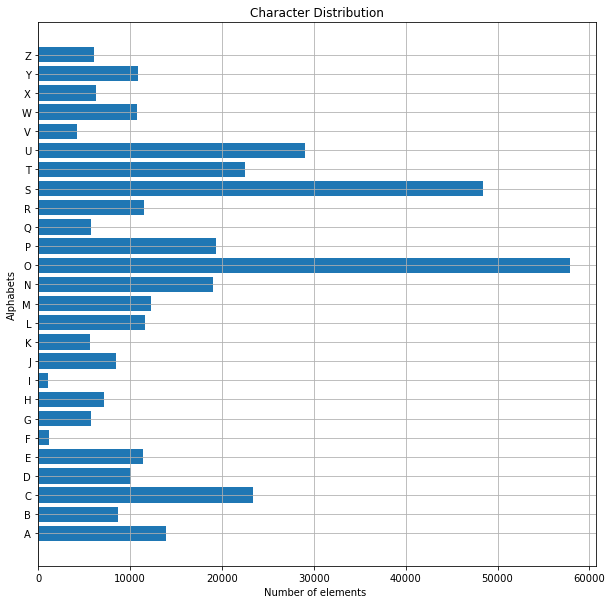

In [36]:
# Firstly we convert the labels into integer values 
# and append into the count list according to the label. 
# This count list has the number of images present in the dataset belonging to each alphabet.
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1 

# y-axis labels
alphabets = []
for i in word_dict.values():
    alphabets.append(i)

# Plot the distribution of letters in the dataset
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.title("Character Distribution")
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

### Shuffling the data

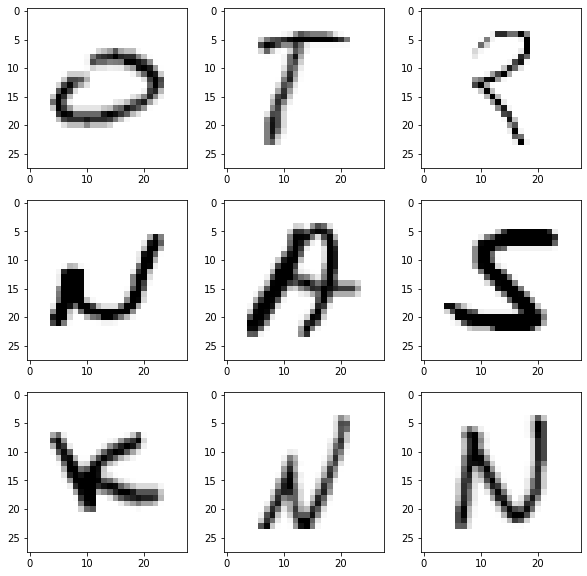

In [38]:
# Shuffle some of the images/characters in the training set to display random images
shuff = shuffle(train_x[:100])


# Create 9 plots in 3×3 shape & display the thresholded images of 9 alphabets
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

### Reshaping the training & test dataset so that it can be put in the model

In [39]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [41]:
# Here we convert the single float values to categorical values. 
# This is done as the CNN model takes input of labels & generates the output as a vector of probabilities.

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


### Train our model!

In [42]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

### Compile and fit our model

In [43]:
# Compile our model where we define the optimizing function & the loss function to be used for fitting
# Using Adam optimizing function, that is a combination of RMSprop & Adagram optimizing algorithms
# Since the dataset is very large we are using a single epoch, but for higher accuracy & character recognition multiple epochs is better
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

9312/9312 [==============================] - 132s 14ms/step - loss: 0.1618 - accuracy: 0.9563 - val_loss: 0.0891 - val_accuracy: 0.9763


### Get our model summary

In [44]:
# The summary tells us what were the different layers defined in the model & also we save the model 
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [45]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9762787222862244]
The training accuracy is : [0.9563364386558533]
The validation loss is : [0.08908005058765411]
The training loss is : [0.16179734468460083]


### Let's make some predictions using test data

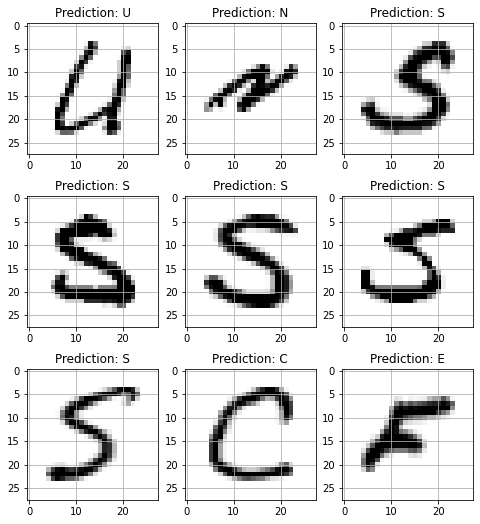

In [46]:
# Creating 9 subplots of (3,3) shape & visualizing some of the test dataset alphabets along with their predictions, 
# that are made using the model.predict() function for text recognition.

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

### Run a prediction on an external image

In [52]:
# Read in an image of a 'Q' 
# Make a copy of it that is to go through some processing to be fed to the model for the prediction
img = cv2.imread('q.jpeg')
img_copy = img.copy()

# The img read is then converted from BGR representation (as OpenCV reads the image in BGR format) 
# to RGB for displaying the image, & is resized to our required dimensions that we want to display the image in
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [53]:
# Process the image by applying Gaussian Blur to reduce image noise & detail
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)

# Convert the copy to greyscale 
# Apply threshold to keep the image smooth without any sort of hazy gray colors which could lead to wrong predictions
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

# Resize the final smoothened image into the dimensions the model takes as an input
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [54]:
# Make a prediction 
# Use np.argmax() function to get the index of the class with the highest predicted probability, using this we get to know the exact character through the word_dict dictionary
# This predicted character is then displayed on the frame.

img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)

In [ ]:
# Set up a waitKey in a while loop that will be stuck in loop until Esc is pressed to exit the loop & destroy all windows

while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()